# Python数据分析第一次作业（2023春）
各位同学好！本Jupyter notebook文件包括2023春《Python数据分析》第一次作业的全部题目。<br />
本作业使用citibike单车数据集（ https://citibikenyc.com/system-data ）。Citi Bike是纽约市在2013年5月27日启动的一项自行车共享计划，由“花旗银行”(Citi Bank)赞助并取名为“花旗单车”(Citi Bike)。在曼哈顿，布鲁克林，皇后区和泽西市有8,000辆自行车和500个车站，为纽约的居民和游客提供一种方便快捷，并且省钱的出行方式。由于每个Citi Bank的租赁站点都有GPS位置信息，因此可以记录到用户租赁和骑行过程中的数据。“Citi Bank”官网提供了用户每一次骑行的数据，包括租赁开始及结束的位置及时间，整个骑行过程的时间，自行车ID，以及用户的性别和出生日期等数据。本次作业选取了其中2017年7月的数据。<br /><br />
本次作业满分为10分，各题具体分值已在每道题目后给出。作业整体要求具体如下，不符合要求将另外扣分：<br />
1.请将【所有代码和文字】写在本jupyter notebook中，并只在教学网上提交这一个.ipynb文件。命名为【学号-姓名】，例如2100016666-张三.ipynb。<br />
2.请保证提交的notebook可完整运行，提交【按顺序全部运行后】的文件。<br />
3.请保证代码的【可读性】，并适当添加【注释】说明代码功能。<br />
4.部分题目会要求【说明结果】，请用文字对运行结果做简要说明，解释输出内容的含义。

## 1.读取citibike-tripdata.csv，并分别显示前3行和后3行。（0.5分）

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
bike=pd.read_csv('citibike-tripdata.csv',encoding='gbk')      #数据读取


In [79]:
bike.head(3)     #显示前3行

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789211,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2


In [80]:
bike.tail(3)     #显示后三行

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1735596,1211,2017-07-31 23:59:37,2017-08-01 00:19:49,3303,Butler St & Court St,40.684989,-73.994403,3308,Kane St & Clinton St,40.686176,-73.996453,28402,Subscriber,1975.0,2
1735597,547,2017-07-31 23:59:48,2017-08-01 00:08:56,276,Duane St & Greenwich St,40.717488,-74.010455,127,Barrow St & Hudson St,40.731724,-74.006744,30150,Subscriber,1992.0,1
1735598,1816,2017-07-31 23:59:57,2017-08-01 00:30:13,3091,Frost St & Meeker St,40.717640,-73.948820,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,19643,Customer,NaN,0


## 2. 统计各个字段缺失值比例，并将数值转化为百分比形式，保留两位小数，如9.99%。（1分）

In [81]:
print("各个字段缺失值比例：")
nabike=bike.isnull().sum()     #查看缺失值
nabike.apply(lambda x: "{:.2f}%".format(100*x/len(bike)))     #查看缺失值占比

各个字段缺失值比例：


tripduration                0.00%
starttime                   0.00%
stoptime                    0.00%
start station id            0.00%
start station name          0.00%
start station latitude      0.00%
start station longitude     0.00%
end station id              0.00%
end station name            0.00%
end station latitude        0.00%
end station longitude       0.00%
bikeid                      0.00%
usertype                    0.00%
birth year                 13.17%
gender                      0.00%
dtype: object

## 3. 统计骑行时间(tripduration)字段的最大值、最小值、均值、各个四分位数及方差。（0.5分）

In [82]:
# 计算自行车骑行时间的最大值、最小值、均值、Q1、Q2、Q3、方差
max_duration = bike["tripduration"].max()  # 最大值
min_duration = bike["tripduration"].min()  # 最小值
mean_duration = bike["tripduration"].mean()  # 均值
q1_duration = bike["tripduration"].quantile(0.25)  # Q1
q2_duration = bike["tripduration"].quantile(0.5)  # Q2
q3_duration = bike["tripduration"].quantile(0.75)  # Q3
var_duration = bike["tripduration"].var()  # 方差

# 输出结果
print(f"最大值：{max_duration:.2f}")
print(f"最小值：{min_duration:.2f}")
print(f"均值：{mean_duration:.2f}")
print(f"Q1：{q1_duration:.2f}")
print(f"Q2：{q2_duration:.2f}")
print(f"Q3：{q3_duration:.2f}")
print(f"方差：{var_duration:.2f}")


最大值：2477222.00
最小值：61.00
均值：1060.14
Q1：395.00
Q2：676.00
Q3：1183.00
方差：92591672.13


## 4. 统计骑行时间大于等于12小时的记录个数，并将相应记录从原DataFrame中剔除。骑行时间字段的单位为秒。（0.5分）

In [83]:

#统计骑行时间大于12小时的记录个数
bike_long = bike[bike["tripduration"] >= 12 * 3600]
num_records = bike_long.shape[0]

#将相应记录从原本的DataFrame中删除
bike.drop(bike_long.index, inplace=True)

# 输出结果
print(f"共有 {num_records} 条记录骑行时间大于等于12小时。")
print("已将这些记录从原始数据集中删除。")


共有 1042 条记录骑行时间大于等于12小时。
已将这些记录从原始数据集中删除。


## 5. 检查所有站点id和站点name是否一一对应，说明结果。如果有站点id相同name不同，或站点id不同name相同的，将涉及这些站点的记录从数据中剔除。（1分）

In [84]:




# 合并起始站和终止站到一个新的站列中
stations = pd.concat([
    bike[['start station id', 'start station name']].rename(
        columns={'start station id': 'station id', 'start station name': 'station name'}
    ),
    bike[['end station id', 'end station name']].rename(
        columns={'end station id': 'station id', 'end station name': 'station name'}
    )
]).drop_duplicates()

# 创建ID和名称之间的映射字典
station_dict = dict(zip(stations['station id'], stations['station name']))

# 检查字典中的值是否唯一
if len(set(station_dict.values())) == len(station_dict):
    print('所有站点的名称都是唯一的。')
else:
    print('某些站点的名称不是唯一的。')

# 判断起始站和终止站的ID和名称是否匹配
inconsistent_start = bike[bike.apply(lambda x: station_dict[x['start station id']] != x['start station name'], axis=1)]
inconsistent_end = bike[bike.apply(lambda x: station_dict[x['end station id']] != x['end station name'], axis=1)]

# 输出结果
print(f"所有站点中有 {inconsistent_start.shape[0]+inconsistent_end.shape[0]} 条记录的ID和名称不匹配。")
print("因此，我们可以认为所有站点的ID和名称是一一对应的。")




所有站点的名称都是唯一的。
所有站点中有 0 条记录的ID和名称不匹配。
因此，我们可以认为所有站点的ID和名称是一一对应的。


##思路说明： 在创造字典的过程中将start station和end station合并成station进行考虑
            创建id 和name之间映射关系的字典
            drop_duplicates()去除的是重复行，可以保证键（id）是唯一的，但是没有办法保证值是唯一的
            因此检查字典中的值是不是唯一的
            使用apply函数进行判断。分别利用字典检查起始station id和station name是否一一对应
            最后分别输出起点、终点中没有对应的个数


##结果说明：字典中的值和键都是唯一的
            起点、终点中没有对应的个数都是0，所以所有站点id和站点name一一对应

## 6. 根据bikeid字段统计在数据中有多少辆不同的自行车。（0.5分）

In [85]:
# 统计自行车数量
num_bikes = bike['bikeid'].nunique()

# 输出结果
print(f"共有 {num_bikes} 辆自行车。")


共有 10422 辆自行车。


## 7. 统计每辆自行车的骑行次数、总骑行时间、平均每次骑行时间、经过的不同站点的个数。生成以bikeid为index、指标为columns的DataFrame（1.5分）

In [86]:
#创建指标columns
columns=["rideTimes","TotalTime","AverageTime","StationNums"]

#每辆自行车的骑行次数
rideTimes=bike["bikeid"].value_counts()

#每辆自行车的总骑行时间
TotalTime=bike["tripduration"].groupby(bike["bikeid"]).sum()

#每辆自行车车的平均骑行时间
AverageTime=bike["tripduration"].groupby(bike["bikeid"]).mean()

# 计算每辆自行车经过的不同站点个数
start_stations = bike[["bikeid", "start station id"]].drop_duplicates()
end_stations = bike[["bikeid", "end station id"]].drop_duplicates()
StaCnt = (start_stations.groupby("bikeid")["start station id"].nunique() + end_stations.groupby("bikeid")["end station id"].nunique())

# 生成以bikeid为index,指标为columns的DataFrame
bikeid = pd.DataFrame(index=rideTimes.index, columns=columns)

# 命名dataframe的index为bikeid
bikeid.index.name = "bikeid"
bikeid["rideTimes"] = rideTimes
bikeid["TotalTime"] = TotalTime
bikeid["AverageTime"] = AverageTime
bikeid["StationNums"] = StaCnt

# 按照rideTimes进行排序
bikeid.sort_values(by="rideTimes", inplace=True)
bikeid




,rideTimes,TotalTime,AverageTime,StationNums
bikeid,,,,
19118,1,785,785.000000,2
29210,1,386,386.000000,2
29838,1,209,209.000000,2
30294,1,219,219.000000,2
24747,1,385,385.000000,2
...,...,...,...,...
28342,379,323920,854.670185,406
27407,381,319647,838.968504,441
29349,382,311786,816.193717,435


## 8. 分别统计各天7:00-8:59男性乘客（gender为1）出发最多的站点。（1.5分）

In [87]:
#对时间进行处理
bike["starttime"]=pd.to_datetime(bike["starttime"])
bike["stoptime"]=pd.to_datetime(bike["stoptime"])
#截取年月日,统一储存在一列中
bike["startYMD"]=bike["starttime"].dt.strftime("%Y-%m-%d")
#截取时分秒,统一储存在一列中
bike["startHMS"]=bike["starttime"].dt.strftime("%H:%M:%S")
#筛选符合时间和性别的数据
# 统计每天的出发次数最多的站点
bike_filter=bike[(bike["startHMS"]>="07:00:00")&(bike["startHMS"]<="08:59:59")&(bike["gender"]==1)]

#统计每天的出发次数最多的站点,包括并列最多的站点
bike_filter.groupby(["startYMD"])["start station name"].value_counts().groupby(level=0).apply(lambda x: x[x == x.max()].sort_values(ascending=False)).reset_index(level=1, drop=True)



startYMD    start station name    
2017-07-01  E 20 St & 2 Ave            11
            W 22 St & 8 Ave            11
2017-07-02  8 Ave & W 33 St            10
            W 49 St & 8 Ave            10
2017-07-03  Pershing Square North      63
2017-07-04  West Thames St             13
2017-07-05  Pershing Square North     119
2017-07-06  Pershing Square North     111
2017-07-07  8 Ave & W 31 St            74
2017-07-08  Broadway & W 60 St         12
            E 17 St & Broadway         12
2017-07-09  1 Ave & E 18 St             9
            Perry St & Bleecker St      9
2017-07-10  Pershing Square North     117
2017-07-11  Pershing Square North     138
2017-07-12  Pershing Square North     115
2017-07-13  Pershing Square North     121
2017-07-14  8 Ave & W 31 St            43
2017-07-15  9 Ave & W 22 St            14
            Central Park S & 6 Ave     14
2017-07-16  West St & Chambers St      13
2017-07-17  Pershing Square North     113
2017-07-18  Pershing Square North     140

说明：结果是符合要求的出发站点和出发的次数

## 9.统计17点整时骑行人数最多的3条（有向）路线（a到b和b到a视为两条路线）。给出路线起始站点id和骑行人数。（1分）

In [88]:
import copy
#处理结束时间格式
bike["stopHMS"]=bike["stoptime"].dt.strftime("%H:%M:%S")
#统计17点整在骑行的数据
bike_17=bike.copy()
bike_17=bike_17[(bike_17["stopHMS"]>="17:00:00") &(bike_17["startHMS"]<="17:00:00")]
#提取其中的路线id
bike_17.loc[:,"route"]=bike_17.loc[:,"start station id"].astype(str)+"-"+bike_17.loc[:,"end station id"].astype(str)
#统计路线id和骑行人数
print("17点整在骑行的路线和骑行人数：\n")
print("路线id\t    骑行人数")
bike_17["route"].value_counts().head(3)




#经过检验，第四条和第三条的骑行人数不同，不存在并列情况，因此只需要统计前三条路线即可


#解释：类似于281-281 的路线可以视作自环边（起点和终点相同的有向边），因此可以包括在有向路线中

17点整在骑行的路线和骑行人数：

路线id	    骑行人数


281-281      128
3254-3254    102
3182-3182     93
Name: route, dtype: int64

#### **解释：类似于281-281 的路线可以视作自环边（起点和终点相同的有向边），因此可以包括在有向路线中**

## 10. 统计usertype的中用户类型个数，简单分析并说明每类用户在骑行时长和骑行时间段上的差异，言之有理即可。（2分）

统计usertype中用户类型的个数
Subscriber    1473470
Customer       261087
Name: usertype, dtype: int64

###################################



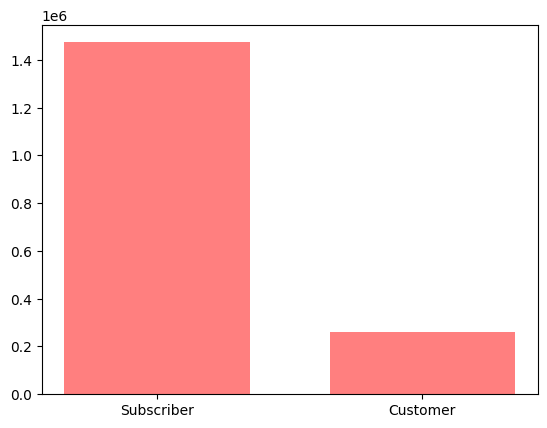

In [89]:
#统计usertype中用户类型的个数
print("统计usertype中用户类型的个数")
print(bike["usertype"].value_counts())
Y1=bike["usertype"].value_counts()
X1=bike["usertype"].value_counts().index
plt.bar(X1,Y1,color="red",alpha=0.5,width=0.7,align="center")
print()
print("###################################")
print()

In [90]:
%matplotlib inline

每类用户在骑行时长的差异
                count         mean          std   min    25%     50%     75%  \
usertype                                                                       
Customer     261087.0  1647.531643  1986.934842  61.0  849.0  1291.0  1738.0   
Subscriber  1473470.0   798.296072   848.817010  61.0  367.0   603.0  1021.0   

                max  
usertype             
Customer    43173.0  
Subscriber  42930.0  

    可以看出，订阅者的平均骑行时长要比非订阅者的平均骑行时长短,订阅者的标准差比非订阅者的标准差小
    因此，可以认为订阅者的骑行时长更稳定、更短、非订阅者的骑行时长更随机、不稳定、更长
    可以推测，订阅者每次骑行可能有更加固定的线路，而非订阅者每次骑行可能没有比较固定的线路。
    进一步推测，订阅者的骑行原因可能是因为有固定通勤需求，而非订阅者的骑行原因可能是因为没有固定的通勤需求
###################################

下面Subscribers的骑行时长分布图


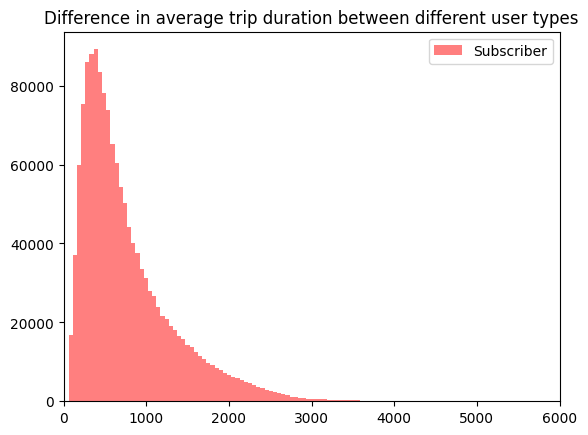

下面是Customers的骑行时长分布图


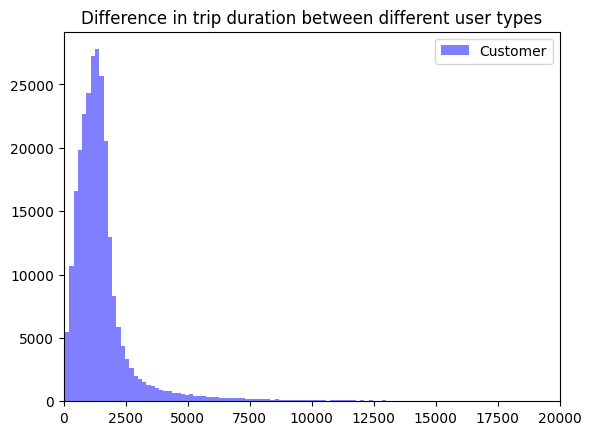

In [91]:

#每类用户在骑行时长的差异
print("每类用户在骑行时长的差异")
print(bike.groupby("usertype")["tripduration"].describe())
print()
print('\033[31m' + "    可以看出，订阅者的平均骑行时长要比非订阅者的平均骑行时长短,订阅者的标准差比非订阅者的标准差小" +'\033[0m')
print('\033[31m'+"    因此，可以认为订阅者的骑行时长更稳定、更短、非订阅者的骑行时长更随机、不稳定、更长"+'\033[0m')
print('\033[31m' +"    可以推测，订阅者每次骑行可能有更加固定的线路，而非订阅者每次骑行可能没有比较固定的线路。"+'\033[0m')
print('\033[31m' +"    进一步推测，订阅者的骑行原因可能是因为有固定通勤需求，而非订阅者的骑行原因可能是因为没有固定的通勤需求"+'\033[0m')
print("###################################")
print()

Y1=bike.groupby("usertype")["tripduration"].describe()["mean"]
X1=bike.groupby("usertype")["tripduration"].describe()["mean"].index
y1=bike[bike["usertype"]=="Subscriber"]["tripduration"]
y2=bike[bike["usertype"]=="Customer"]["tripduration"]

# plt.bar(X1,Y1,color="red",alpha=0.5,width=0.7,align="center")
# plt.title("Difference in average trip duration between different user types")
# print("下面是不同用户类型的平均单次骑行时长对比图")
# plt.show()


plt.hist(y1,bins=850,color="red",alpha=0.5,label="Subscriber")
plt.xlim(0,6000)
print("下面Subscribers的骑行时长分布图")
plt.legend()
plt.title("Difference in average trip duration between different user types")
plt.show()


plt.hist(y2,bins=250,color="blue",alpha=0.5,label="Customer")
plt.xlim(0,20000)
plt.legend()
print("下面是Customers的骑行时长分布图")
plt.title("Difference in trip duration between different user types")
plt.show()


# #绘制骑行时长的箱线图
# plt.boxplot([y1, y2], labels=["Subscriber", "Customer"], 
#             flierprops=dict(marker='o', markersize=0.02))

# plt.title("Difference in trip duration between different user types")
# plt.show()




##### 可以看出，订阅者的骑行时长分布主要在0-1000s左右，大多是订阅者的骑行时长在在15min内
##### 但是非订阅者（Customer）的 骑行时长主要分布在500s-2000s左右，大多数的非订阅者的骑行时长在25min左右，明显骑行时间偏长。

每类用户在骑行时间段的差异

################################################################

Morning: 06:00:00-11:59:59
Afternoon: 12:00:00-16:59:59
Evening: 17:00:00-20:59:59
Night: 21:00:00-05:59:59

每类用户在每日骑行时间段的差异


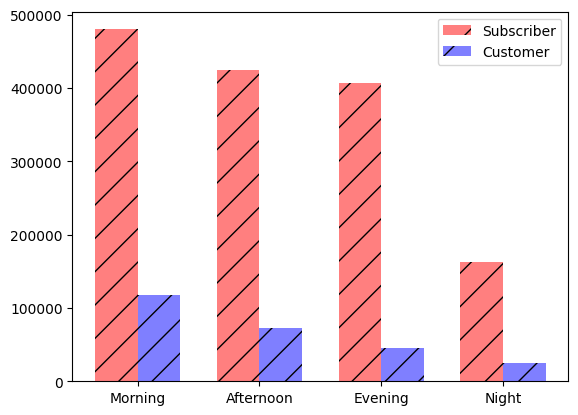

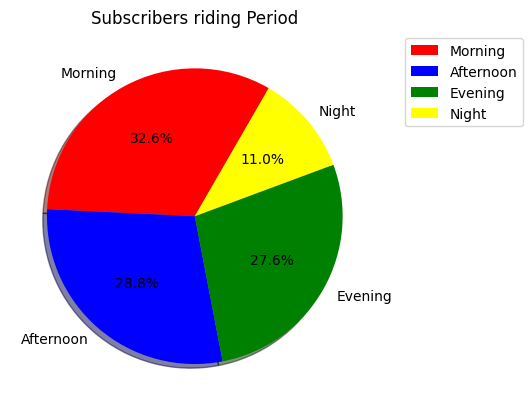

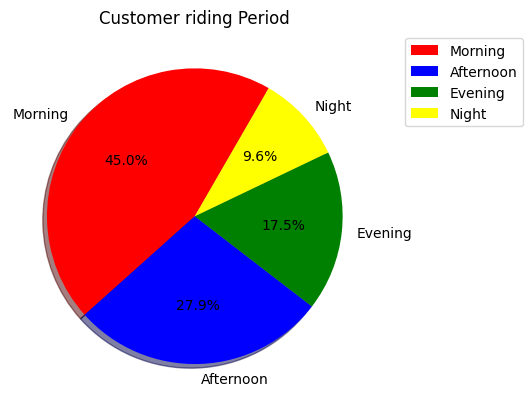

################################################################

每类用户在每周骑行时间段的差异


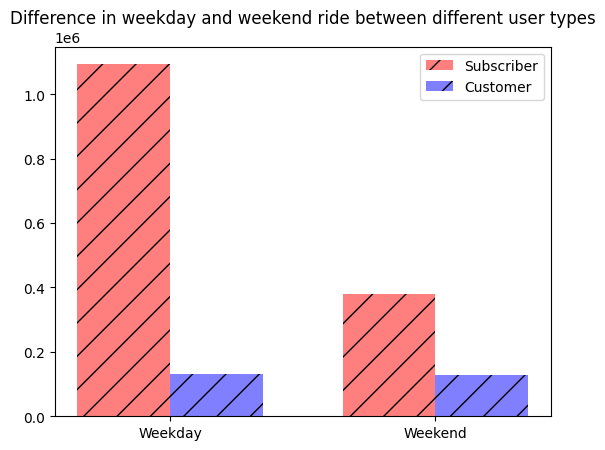

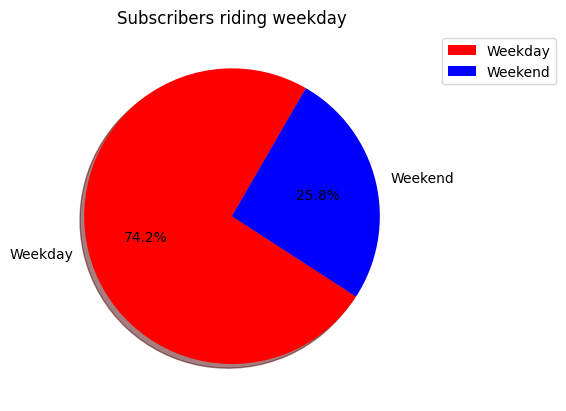

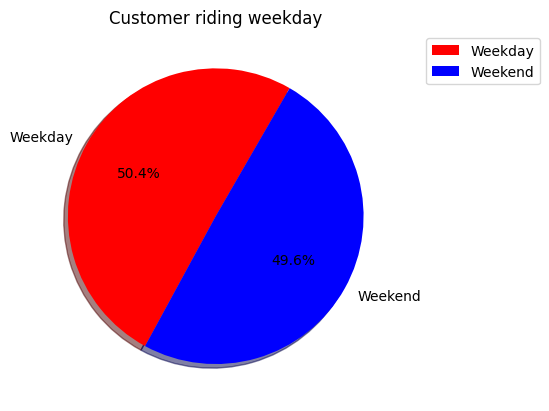

In [92]:

#每类用户在骑行时间段的差异
print("每类用户在骑行时间段的差异")
print()
print("################################################################")
print()
print("Morning: 06:00:00-11:59:59")
print("Afternoon: 12:00:00-16:59:59")
print("Evening: 17:00:00-20:59:59")
print("Night: 21:00:00-05:59:59")
print()
#每类用户在每日骑行时间段的差异
print("每类用户在每日骑行时间段的差异")
bike["period"]=bike["startHMS"].apply(lambda x: "Morning" if x>="06:00:00" and x<="11:59:59" else "Afternoon" if x>="12:00:00" and x<="16:59:59" else "Evening" if x>="17:00:00" and x<="20:59:59" else "Night")
U1=bike[bike["usertype"]=="Subscriber"]["period"]
U2=bike[bike["usertype"]=="Customer"]["period"]


bar_width=0.35
x=np.arange(4)
Y1=U1.value_counts()
Y2=U2.value_counts()
tick_label=["Morning","Afternoon","Evening","Night"]

plt.bar(x,Y1,width=bar_width,label="Subscriber",color="red",alpha=0.5,align="center",hatch="/")
plt.bar(x+bar_width,Y2,width=bar_width,label="Customer",color="blue",alpha=0.5,align="center",hatch="/")
plt.xticks(x+bar_width/2,tick_label)
plt.legend(loc="upper right")
plt.show()

colors=["red","blue","green","yellow"]
plt.pie(Y1,labels=tick_label,autopct="%1.1f%%",shadow=True,colors=colors,startangle=60)
plt.title("Subscribers riding Period")
plt.legend(bbox_to_anchor=(1.05,1.0),loc="upper left")
plt.show()

plt.pie(Y2,labels=tick_label,autopct="%1.1f%%",shadow=True,colors=colors,startangle=60)
plt.title("Customer riding Period")
plt.legend(bbox_to_anchor=(1.05,1.0),loc="upper left")
plt.show()


print("################################################################")
print()
print("每类用户在每周骑行时间段的差异")
#每类用户在每周骑行时间段的差异
bike["weekday"]=bike["starttime"].dt.strftime("%A")
bike["weekday"]=bike["weekday"].apply(lambda x: "Weekday" if x!="Saturday" and x!="Sunday" else "Weekend")
U1=bike[bike["usertype"]=="Subscriber"]["weekday"]
U2=bike[bike["usertype"]=="Customer"]["weekday"]
bar_width=0.35
x=np.arange(2)
Y1=U1.value_counts()
Y2=U2.value_counts()
tick_label=["Weekday","Weekend"]

plt.bar(x,Y1,width=bar_width,label="Subscriber",color="red",alpha=0.5,align="center",hatch="/")
plt.xticks(x+bar_width/2,tick_label)
plt.legend(loc="upper right")



plt.bar(x+bar_width,Y2,width=bar_width,label="Customer",color="blue",alpha=0.5,align="center",hatch="/")
plt.xticks(x+bar_width/2,tick_label)
plt.legend(loc="upper right")
plt.title("Difference in weekday and weekend ride between different user types")
plt.show()

plt.pie(Y1,labels=tick_label,autopct="%1.1f%%",shadow=True,colors=colors,startangle=60)
plt.title("Subscribers riding weekday")
plt.legend(bbox_to_anchor=(1.05,1.0),loc="upper left")
plt.show()

plt.pie(Y2,labels=tick_label,autopct="%1.1f%%",shadow=True,colors=colors,startangle=60)
plt.title("Customer riding weekday")
plt.legend(bbox_to_anchor=(1.05,1.0),loc="upper left")
plt.show()





#### 思路：将不同用户的骑行时间段拆分成每天的骑行时间段和每周的骑行时间段进行可视化分析


###      根据上图可以推测：
###      Subscriber
###      1.更多的是上下班的人
###      2.更多的是在工作日骑行
###      3.更多的是在短途骑行
###      

## 下面进行适度的延申推测


##### 1、客户（Customer）可能更常使用自行车共享来进行休闲娱乐、旅游等偶尔的出行，而订阅者（Subscriber）可能更多的使用它来进行上下班的通勤、跑腿等日常的出行。
##### 2、客户（Customer）的出行时间和距离往往比订阅者（Subscriber）长，而且他们和订阅者相比，更加倾向在周末出行
